### Codio Activity 3.6: Indexing

**Expected Time**: 60 Minutes

**Total Points**: 10

This activity works through a similar example to the video, again using the gapminder dataset.  The goal is to compute what fraction of the worlds GDP did each country generate each year. 

#### Index:

- [Problem 1](#Problem-1:-Total-GDP-by-year)
- [Problem 2](#Problem-2:-Resetting-the-Index)
- [Problem 3](#Problem-3:-Computing-Share-of-GDP)
- [Problem 4](#Problem-4:-Resetting-the-Index-Again)
- [Problem 5](#Problem-5:-Plotting-the-results)

In [169]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
gapminder = px.data.gapminder()

In [171]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [172]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


[Back to top](#Index:) 


### Problem 1: Total GDP per Capita by year

**2 Points**

Use the `groupby` operation to group on the year column and compute the total GDP per Capita (`gdpPercap`) for each year (`sum`). Assign your results as a DataFrame to ans1 below.

In [173]:
### GRADED

ans1 = None

### BEGIN SOLUTION
ans1 = gapminder.groupby('year').sum()

### END SOLUTION

# Answer check
print(ans1)
print(type(ans1))

         lifeExp         pop     gdpPercap  iso_num
year                                               
1952  6966.18200  2406957150  5.289892e+05    60475
1957  7314.05096  2664404580  6.105160e+05    60475
1962  7612.51336  2899782974  6.710654e+05    60475
1967  7906.31712  3217478384  7.786787e+05    60475
1972  8185.92888  3576977158  9.613518e+05    60475
1977  8458.96236  3930045807  1.038470e+06    60475
1982  8737.71400  4289436840  1.067684e+06    60475
1987  8976.19100  4691477418  1.121931e+06    60475
1992  9110.76800  5110710260  1.158522e+06    60475
1997  9232.08400  5515204472  1.290805e+06    60475
2002  9328.67900  5886977579  1.408334e+06    60475
2007  9515.05400  6251013179  1.658570e+06    60475
<class 'pandas.core.frame.DataFrame'>


C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\3860199602.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans1 = gapminder.groupby('year').sum()


In [174]:
### BEGIN HIDDEN TESTS
gapminder_ = px.data.gapminder()
ans1_ = gapminder_.groupby('year').sum()
#
#
#
assert type(ans1_) == type(ans1)
pd.testing.assert_frame_equal(ans1, ans1_)
### END HIDDEN TESTS

C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\2932602064.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans1_ = gapminder_.groupby('year').sum()


[Back to top](#Index:) 


### Problem 2: Resetting the Index

**2 Points**

In order to compute the share of GDP, set the index of the original gapminder dataframe to a multi-index DataFrame with `set_index` using the `year` and `country` columns. Assign the resulting DataFrame to `ans2` below.

In [175]:
### GRADED

ans2 = None

### BEGIN SOLUTION
ans2 = gapminder.set_index(['year', 'country'])
### END SOLUTION

# Answer check
print(ans2.head())
print(type(ans2))

                 continent  lifeExp       pop   gdpPercap iso_alpha  iso_num
year country                                                                
1952 Afghanistan      Asia   28.801   8425333  779.445314       AFG        4
1957 Afghanistan      Asia   30.332   9240934  820.853030       AFG        4
1962 Afghanistan      Asia   31.997  10267083  853.100710       AFG        4
1967 Afghanistan      Asia   34.020  11537966  836.197138       AFG        4
1972 Afghanistan      Asia   36.088  13079460  739.981106       AFG        4
<class 'pandas.core.frame.DataFrame'>


In [176]:
### BEGIN HIDDEN TESTS
gapminder_ = px.data.gapminder()
ans2_ = gapminder_.set_index(['year', 'country'])
#
#
#
assert type(ans2_) == type(ans2)
pd.testing.assert_frame_equal(ans2, ans2_)
### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 3: Computing Share of GDP

**2 Points**

Use your solutions from problem 1 and 2 to determine each country's share of the world GDP by year. Assign the resulting DataFrame to `ans3` below. 

In [177]:
### GRADED

ans3 = None

### BEGIN SOLUTION
ans3 = gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum()
### END SOLUTION

# Answer check
print(ans3.head())
print(ans3.shape, gapminder.shape)

                  continent  gdpPercap  iso_alpha   iso_num   lifeExp  \
year country                                                            
1952 Afghanistan        NaN   0.001473        NaN  0.000066  0.004134   
1957 Afghanistan        NaN   0.001345        NaN  0.000066  0.004147   
1962 Afghanistan        NaN   0.001271        NaN  0.000066  0.004203   
1967 Afghanistan        NaN   0.001074        NaN  0.000066  0.004303   
1972 Afghanistan        NaN   0.000770        NaN  0.000066  0.004409   

                       pop  
year country                
1952 Afghanistan  0.003500  
1957 Afghanistan  0.003468  
1962 Afghanistan  0.003541  
1967 Afghanistan  0.003586  
1972 Afghanistan  0.003657  
(1704, 6) (1704, 8)


C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\3316406681.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans3 = gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum()


In [178]:
### BEGIN HIDDEN TESTS
gapminder_ = px.data.gapminder()
ans3_ = gapminder_.set_index(['year', 'country'])/gapminder_.groupby('year').sum()
#
#
#
assert type(ans3_) == type(ans3)
pd.testing.assert_frame_equal(ans3, ans3_)
### END HIDDEN TESTS

C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\2538223876.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans3_ = gapminder_.set_index(['year', 'country'])/gapminder_.groupby('year').sum()


[Back to top](#Index:) 


### Problem 4: Resetting the Index Again

**2 Points**

Having computed the share of GDP by year in the earlier question using a multi-index, select the `gdpPercap` column and reset the index of the resulting series.  Assign your solution -- a DataFrame with columns `[year, country, gdpPercap]` -- to `ans4` below. 

In [179]:
### GRADED

ans4 = None

### BEGIN SOLUTION
ans4 = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index()
### END SOLUTION

# Answer check
print(ans4.head())
print(type(ans4))

   year      country  gdpPercap
0  1952  Afghanistan   0.001473
1  1957  Afghanistan   0.001345
2  1962  Afghanistan   0.001271
3  1967  Afghanistan   0.001074
4  1972  Afghanistan   0.000770
<class 'pandas.core.frame.DataFrame'>


C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\2890505721.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans4 = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index()


In [180]:
### BEGIN HIDDEN TESTS
gapminder_ = px.data.gapminder()
ans4_ = (gapminder_.set_index(['year', 'country'])/gapminder_.groupby('year').sum())[['gdpPercap']].reset_index()
#
#
#
assert type(ans4_) == type(ans4)
pd.testing.assert_frame_equal(ans4, ans4_)
### END HIDDEN TESTS

C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\667032038.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans4_ = (gapminder_.set_index(['year', 'country'])/gapminder_.groupby('year').sum())[['gdpPercap']].reset_index()


[Back to top](#Index:) 


### Problem 5: Plotting the results

**2 Points**

Using the list of countries below, query your solution to problem 4 and assign the result to `ans5a` below as a DataFrame.  Use seaborn's `lineplot` to generate a plot where the x-axis represents the year, the y-axis share of world GDP, and hue is `country`.  Add the title "Top Countries Share of GDP 1952 - 2002" and human readable x label and y label.

In [181]:
### GRADED

list_of_countries = ['China', 'United States', 'Japan', 'India', 'United Kingdom', 'Germany']
ans5a = None
ans5b = None

### BEGIN SOLUTION
ans5a = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index().query("country in @list_of_countries")
### END SOLUTION

# Answer check
print(ans5a.head())
print(type(ans5a))

     year country  gdpPercap
288  1952   China   0.000757
289  1957   China   0.000943
290  1962   China   0.000727
291  1967   China   0.000787
292  1972   China   0.000704
<class 'pandas.core.frame.DataFrame'>


C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\193900881.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans5a = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index().query("country in @list_of_countries")


In [182]:
### BEGIN HIDDEN TESTS
gapminder_ = px.data.gapminder()
ans4_ = (gapminder_.set_index(['year', 'country'])/gapminder_.groupby('year').sum())[['gdpPercap']].reset_index()
list_of_countries = ['China', 'United States', 'Japan', 'India', 'United Kingdom', 'Germany']
ans5a_ = ans4_.query("country in @list_of_countries")

#
#
#
assert type(ans5a_) == type(ans5a)
pd.testing.assert_frame_equal(ans5a, ans5a_)
### END HIDDEN TESTS

C:\Users\Plamen\AppData\Local\Temp\ipykernel_38336\1560010177.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ans4_ = (gapminder_.set_index(['year', 'country'])/gapminder_.groupby('year').sum())[['gdpPercap']].reset_index()


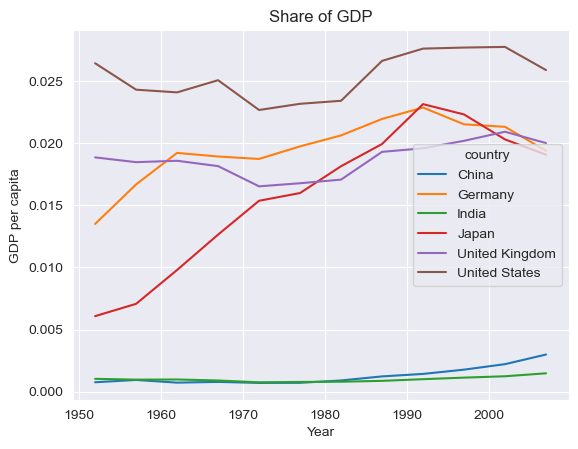

In [183]:
sns.lineplot(data = ans5a, x = 'year', y = 'gdpPercap', hue = 'country')
plt.title('Share of GDP')
plt.xlabel('Year')
plt.ylabel("GDP per capita");

In [184]:
gapminder['lifeExp'].set_index(['year'], inplace=True)

AttributeError: 'Series' object has no attribute 'set_index'